 <small>(This Example is from Chopra and Meindl)</small>
<h5>Estimation of Economic Order Quantity (EOQ)</h5>

As Best Buy sells its current inventory of HP computers, the purchasing manager places a  replenishment order for a new lot of Q computers. Including the cost of transportation, Best Buy incurs a fixed cost of $S per order. The purchasing manager must decide on the number of computers to order from HP in a lot. For this decision, we assume the following inputs:
 - D Annual demand of the product
 - S Fixed cost incurred per order
 - C Cost per unit
 - h Holding cost per year as a fraction of product cost
 
 Assume that HP does not offer any discounts, and each unit costs $C no matter how large an order is. The holding cost is thus given by H = hC. The model is developed using the following basic assumptions:
 1. Demand is steady at D units per unit time.
 2. No shortages are allowed, that is, all demand must be supplied from stock.
 3. Replenishment lead time is fixed (initially assumed to be zero).

The purchasing manager makes the lot-sizing decision to minimize the total cost the store incurs. He or she must consider three costs when deciding on the lot size:
 - Annual material cost
 - Annual ordering cost
 - Annual holding cost

 Because purchase price is independent of lot size, we have
  - Annual material cost = $CD$
 
 The number of orders must suffice to meet the annual demand D. Given a lot size of Q, we thus have
  - Number of orders per year = $\frac{D}{Q}$
 
 Because an order cost of S is incurred for each order placed, we infer that
  - Annual ordering cost = $(\frac{D}{Q}){S}$
 
Given a lot size of Q, we have an average inventory of Q/2. The annual holding cost is thus the cost of holding Q/2 units in inventory for one year and is given as
  - Annual holding cost = $(\frac{Q}{2})H = (\frac{Q}{2})hC$

The total annual cost, TC, is the sum of all three costs and is given as
  - Total annual cost, $TC = CD + (\frac{D}{Q})S + (\frac{Q}{2})hC$


 Figure shows the variation in different costs as the lot size is changed. Observe that  the annual holding cost increases with an increase in lot size. In contrast, the annual ordering cost declines with an increase in lot size. The material cost is independent of lot size because we have assumed the price to be fixed. The total annual cost thus first declines and then increases with an increase in lot size.

 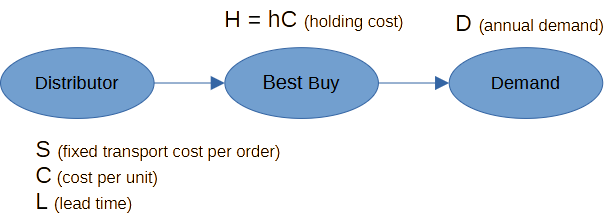

From the perspective of the manager at Best Buy, the optimal lot size is one that minimizes the total cost to Best Buy. It is obtained by taking the first derivative of the total cost with respect to Q and setting it equal to 0. The optimum lot size is referred to as the economic order quantity (EOQ). It is denoted by Q* and is given by the following equation:

 Optimal lot size, $Q* = \sqrt{\frac{2DS}{hC}}$
 
 <h5>Numerical Example</h5>
 Demand for the Deskpro computer at Best Buy is 1,000 units per month. Best Buy incurs a fixed order placement, transportation, and receiving cost of $4,000 each time an order is placed. Each computer costs Best Buy $500 and the retailer has a holding cost of 20 percent. Evaluate the number of computers that the store manager should order in each replenishment lot.
 
 Analysis:
 In this case, the store manager has the following inputs:
 - Annual demand, $D = 1,000 * 12 = 12,000$ units
 - Order cost per lot, $S = 4,000$
 - Unit cost per computer, $C = 500$
 - Holding cost per year as a fraction of unit cost, $h = 0.2$
 
 Using the EOQ formula, the optimal lot size is<br>
 Optimal order size = Q* =  $\sqrt{\frac{2 * 12,000 * 4,000}{0.2 * 500}} = 980$
 
 To minimize the total cost at Best Buy, the store manager orders a lot size of 980 computers for each replenishment order. The cycle inventory is the average resulting inventory and is given by<br>
 Cycle inventory = $\frac{Q*}{2} = 490$
 
 For a lot size of Q* = 980, the store manager evaluates<br>
 Number of orders per year = $\frac{D} {Q*} = \frac{12,000} {980} = 12.24$<br>
 Annual ordering and holding cost = $\frac{D} {Q*} S + (\frac{Q*} {2}) hC = 97,980$<br>
 Average flow time = $\frac{Q*} {2D} = \frac{490} {12,000} = 0.041$ year $= 0.49$ month

 Each computer thus spends 0.49 month, on average, at Best Buy before it is sold because it was purchased in a batch of 980.



lot size 	 Inv holding cost 	 Order cost 	 Average cost(per day) 	 Unmet demand
800 		 380329.73		600000		268.58		4084.00
810 		 390346.44		596000		270.23		4118.00
820 		 395105.20		588000		269.34		4140.00
830 		 400299.95		580000		268.58		4104.00
840 		 404482.59		572000		267.53		4106.00
850 		 409284.90		568000		267.75		4114.00
860 		 415039.59		560000		267.13		4118.00
870 		 419443.84		552000		266.15		4094.00
880 		 423996.44		548000		266.30		4114.00
890 		 429679.97		540000		265.67		4092.00
900 		 432358.48		536000		265.30		4094.00
910 		 438842.84		528000		264.89		4074.00
920 		 442746.08		524000		264.86		4096.00
930 		 448285.44		516000		264.19		4096.00
940 		 453599.47		512000		264.55		4108.00
950 		 457965.37		508000		264.65		4094.00
960 		 459573.44		500000		262.90		4074.00
970 		 468394.14		496000		264.22		4110.00
980 		 472821.99		492000		264.33		4098.00
990 		 477727.70		488000		264.58		4106.00
1000 		 480794.82		480000		263.23		4080.00
1010 		 487363.60		476000		263.94		41

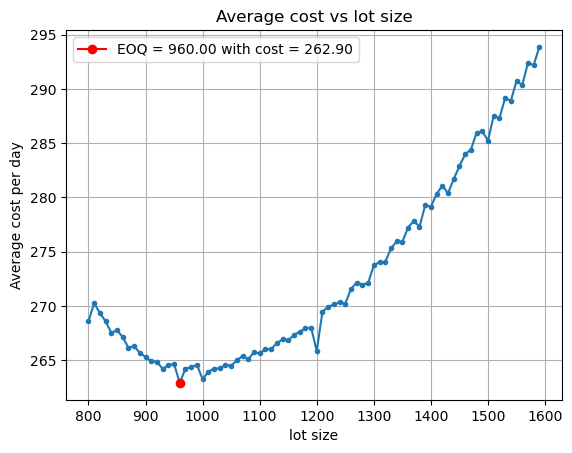

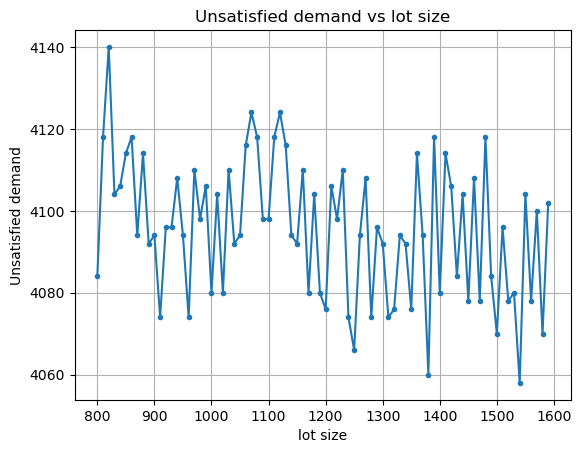

In [ ]:
import simpy
import numpy as np
import matplotlib.pyplot as plt
import SupplyNetPy.Components as scm

"""
 Demand for the Deskpro computer at Best Buy is 1,000 units per month. Best Buy incurs a fixed order placement, 
 transportation, and receiving cost of $4,000 each time an order is placed. Each computer costs Best Buy $500 
 and the retailer has a holding cost of 20 percent. Evaluate the number of computers that the store manager 
 should order in each replenishment lot.
 
 Analysis:
 In this case, the store manager has the following inputs:
 - Annual demand, D = 1,000 * 12 = 12,000 units (approx 34 units per day)
 - Order cost per lot, S = 4,000 
 - Unit cost per computer, C = 500
 - Holding cost per year as a fraction of unit cost, h = 0.2 (500*0.2 = 100 per year => 100/365 = 0.273 per day)

 Assumptions:
 - Demand is constant and deterministic
 - Lead time is zero

Optimum Economic Order Quantity (EOQ) is determined to minimize the total cost.
Total cost = Annual material cost + Annual ordering cost + Annual holding cost
This is same as -> Total cost = total transportation cost + inventory cost (we'll ignore material cost since it is constant)
"""

D = 12000 # annual demand
d = 34 # daily demand
order_cost = 4000 # order cost
unit_cost = 500 # unit cost
holding_cost = 0.273 # holding cost per day
lead_time = 0 # lead time

simlen = 3650 # simulation length in days

total_cost_arr = []
unsat_arr = []
print(f"lot size \t Inv holding cost \t Order cost \t Average cost(per day) \t Unmet demand")
for lot_size in range(800,1600,10):

    order_interval = 365*lot_size/D
    
    env = simpy.Environment()
    
    hp_supplier = scm.Supplier(env=env, ID="S1", name="HPComputers", node_type="infinite_supplier")

    bestbuy = scm.InventoryNode(env=env, ID="D1", name="Best Buy", node_type="distributor",
                                    capacity=lot_size, initial_level=lot_size, inventory_holding_cost=holding_cost,
                                    replenishment_policy=scm.PeriodicReplenishment, product_buy_price=450,
                                    policy_param={'T':order_interval,'Q':lot_size}, product_sell_price=unit_cost)

    link1 = scm.Link(env=env,ID="l1", source=hp_supplier, sink=bestbuy, cost=order_cost, lead_time=lambda: lead_time)

    demand1 = scm.Demand(env=env,ID="d1", name="demand_d1", order_arrival_model=lambda: 1, 
                        order_quantity_model=lambda: d, demand_node=bestbuy, consume_available=True)
    scm.global_logger.disable_logging() # disable logging for all components
    env.run(until=simlen)

    bb_invlevels = np.array(bestbuy.inventory.instantaneous_levels)
    hp_sup_transportation_cost = bestbuy.stats.transportation_cost

    total_cost = bestbuy.stats.inventory_carry_cost + bestbuy.stats.transportation_cost
    total_cost_arr.append([lot_size, total_cost/simlen])
    
    unsat_demand = demand1.stats.demand_placed[1]-demand1.stats.fulfillment_received[1]
    unsat_arr.append([lot_size,unsat_demand])
    print(f"{lot_size} \t\t {bestbuy.stats.inventory_carry_cost:.2f}\t\t{bestbuy.stats.transportation_cost}\t\t{total_cost/simlen:.2f}\t\t{unsat_demand:.2f}")

total_cost_arr = np.array(total_cost_arr)
unsat_arr = np.array(unsat_arr)
EOQ = np.argmin(total_cost_arr[:,1])

plt.figure()
plt.plot(total_cost_arr[:,0], total_cost_arr[:,1],marker='.',linestyle='-')
plt.plot(total_cost_arr[EOQ,0], total_cost_arr[EOQ,1],marker='o',color='red',label=f'EOQ = {total_cost_arr[EOQ,0]:.2f} with cost = {total_cost_arr[EOQ,1]:.2f}')
plt.xlabel("lot size")
plt.ylabel("Average cost per day")
plt.title("Average cost vs lot size")
plt.legend()
plt.grid()

plt.figure()
plt.plot(unsat_arr[:,0], unsat_arr[:,1],marker='.',linestyle='-')
plt.xlabel("lot size")
plt.ylabel("Unsatisfied demand")
plt.title("Unsatisfied demand vs lot size")
plt.grid()

plt.show()